*Collaborators: Phoebe Dinh, Jeanean Naqvi, Patience Stevens*

# 1) Proofs

**a) MSE**

$$\begin{aligned}
E[(Y-(b_{0}+b_{1}X))^{2}]  &= E[Y^{2} - 2Y(b_{0} + b_{1}X) + (b_{0} + b_{1}X)^{2}]\\
                           &= E[Y^{2}] - 2E[Yb_{0} + Yb_{1}X] + E[(b_{0}^{2} + 2b_{0}b_{1}X + b_{1}^{2}X^{2}]\\
                           &= E[Y^2] - 2b_{0}E[Y] - 2b_{1}E[XY] + b_{0}^{2} + 2b_{0}b_{1}E[X] + b_{1}^{2}E[X^{2}]\\
                           &= E[Y^{2}] -2b_{0}E[Y] - 2b_{1}(Cov[X,Y] + E[X]E[Y]) + b_{0}^{2} + 2b_{0}b_{1}E[X] + b_{1}^{2}Var[X] + b_{1}^{2}E[X]^{2}\\
                           &= E[Y^{2}] -2b_{0}E[Y] - 2b_{1}Cov[X,Y] - 2b_{1}E[X]E[Y] + b_{0}^{2} + 2b_{0}b_{1}E[X] + b_{1}^{2}Var[X] + b_{1}^{2}E[X]^{2}\\
\end{aligned}$$

**b) MLE of $b_0$ is $E[Y]-b_1E[X]$**


$$\frac{\partial }{\partial b_{0}} E[(Y-(b_{0}+b_{1}X))^{2}] = -2E[Y]+2b_{0}+2b_{1}E[X]$$

<br>

$$
2E[Y] = 2b_{0}+2b_{1}E[X]\\
b_{0} = E[Y] - b_{1}E[X]\\
$$


**c) MLE of $b_1$ is $Cov[X,Y]-Var[X]$** 

$$\frac{\partial}{\partial b_{1}} E[(Y-(b_{0} + b_{1}X))^{2}] = -2Cov[X,Y] -2E[X]E[Y] +2b_{0}E[X] + 2b_{1}Var[X] + 2b_{1}(E[X])^{2}$$
<br>

$$\begin{aligned}
\frac{\partial}{\partial b_{1}} E[(Y-(b_{0} + b_{1}X))^{2}] &= -2Cov[X,Y] -2E[X]E[Y] +2(E[Y] - b_{1}E[X])E[X] + 2b_{1}Var[X] + 2b_{1}(E[X])^{2}\\
                                                              &= -2Cov[X,Y] -2E[X]E[Y] +2E[Y]E[X] - 2b_{1}E[X]^{2} + 2b_{1}Var[X] + 2b_{1}(E[X])^{2}\\
                                                              &= -Cov[X,Y] + b_{1}Var[X]\\
\end{aligned}$$
<br>
$$b_{1}Var[X] - Cov[X,Y] = 0 $$
$$b_{1} = \frac{Cov[X,Y]}{Var[X]}$$

# 2) Model evaluation

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \qquad TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2\\ 
$$

**Residual Standard Error**
Residual standard error is a measure of the confidence of the residual error of the model, or the certainty in the amount of variance in y unaccounted for. A model that fits data well should have a small residual sum of squares and, consequently, a small residual standard error, provided that $n$ is sufficiently large. 
<br>
$$ RSE = \sigma_{model}^2 = \sqrt{ \frac{RSS}{n-2} } $$
**Coefficient of determination (R^2)**
The coefficient of determination complements the RSE; it tells us how much of the variance in y *is* accounted for by the model. It compares the variance accounted for to the total variance of y. The $R^2$ values span 0-1, with a value of 1 indicating a model that captures the variance in y perfectly.
<br>
$$ r^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2} {\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

**F statistic** The F statistic compare the degree of variance accounted for by the model to the total variance of the data, but it also includes the dimensionality of the data ($n$ & $p$). The only bound on F is that it will be a positive number. 
<br>
$$ F = \frac{ \frac{(TSS-RSS)}{p}} { \frac{RSS}{n - p - 1}} $$

# 3) Predictors

**Model:**$$\mathbf{E}[S]=50 + 20G + 0.07I + 35N + .01GI -10GN$$ where $S$ is Salary, $G$ is GPA, $I$ is IQ, and $N$ is Gender. Gender is an indicator variable where Gender = 1 for Female and 0 for Male.


**a)** For males, the prediction equation becomes 
$$\mathbf{E}[S]=50 + 20G + 0.07I + .01GI$$

and for females, the equation is 
$$\mathbf{E}[S]=85 + 10G + 0.07I + .01GI$$

So, given equivalent IQ and GPA, men will earn more than women when $50 + 20G > 85 + 10G$, which is true when the GPA is $\geq {3.5}$. Men will earn more than women on average given that their GPA is high enough and their IQ is the same. 


**b)**  Prediction equation: $$\mathbf{E}[S] = 85 + 10*4 + 0.07*110 + .01*4*110$$
Women will earn $137,100 per year, on average, given an IQ of 110 and a GPA of 4.0.

In [207]:
(women_salary = 85 + 10*4 + 0.07*110 + .01*4*110)

[1] 137.1

**c)** False, the amount of evidence for an effect isn't determined by its size. There could a large amount of evidence for a small effect. In this case, I would need more information to properly evaluate the evidence for the interaction term coefficient. What are the confidence intervals on the coefficient estimate? Does the model lose less information if the interaction term is included than when it isn't (what are the AIC scores of both)?

# 4) Linear mixed effect model 

the functional form of the linear mixed effect model: $$ Y = \beta X + \upsilon Z + \epsilon $$

**a)** Because $\upsilon Z$ is a term with either unknown or random structure in its variance, we cannot assume that a one-unit increase in Z translates into a one-unit increase in $y$. <br>
**b)** The objective function for a fixed effect linear regression model is:

$$ min(||Y-\beta_0-\beta_1X||^2) $$ 
 
Because the objective function for a mixed effects model assumes that there is a different variance on $\upsilon$ than for the fixed effect coefficients:

$$ \upsilon \sim N(0,\Sigma_{\theta}) $$

we have to estimate an independent covariance matrix $\Lambda_{\theta}$ that explains the random structure in Z. Because of this, we cannot use the simple MLE solution for the OLS regression problem in order to find both $\beta$ and $\upsilon$ (the simple MLE solution relies on a common covariance matrix).

**c)** 
Including random effects in a linear model allows us to better estimate the irreducible error, which allows us to better estimate the degree of variance that the fixed effects account for.

# ISLR problems 

**3.10**

In [115]:
library(ISLR)
library(lme4)
str(Carseats)
sales_mr = lm(Sales ~ Price + Urban + US, data=Carseats)
summary(sales_mr)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


**b)** 
The Price coefficient shows that, on average, sales decrease by 50 dollars when price increases by one dollar, when the UrbanYes and USYes variables are held constant. The UrbanYes coefficient is the difference in sales relative to the rural environment. Here, there's no reliable relationship between urban/rural environments and sales (p=.9, $\beta_{UrbanYes}$ is not significantly different from zero). The USYes coefficient is the difference in sales relative to non-US locations. The sales in US stores are $1200 greater, on average, than in non-US stores, holding all else constant. The intercept represents the mean sales when all of the predictors are 0. Given that the price of car seats will likely not be 0, this is not an informative coefficient. 

**c)** 
$$\mathbf{E}[S] = 13.04 -0.05P -0.02R + 1.2U$$
<center>where $P$ is price, $R$ is Urban, $U$ is US, and $S$ is sales. Urban and US are indicator variables where Urban = 1 for Urban and 0 for Rural and US = 1 for store in the US and 0 for outside of the US.</center>


**d)** We can reject the null hypothesis, that a given coefficient is not significantly different from zero, for the USYes and Price predictors. We can also reject the null hypothesis for the intercept coefficient, but because it predicts the average value of sales when price is 0, it isn't useful.

In [41]:
confint(mr)

,2.5 %,97.5 %
(Intercept),11.76359670,14.32334118
Price,-0.06476419,-0.04415351
UrbanYes,-0.55597316,0.51214085
USYes,0.69130419,1.70984121


In [60]:
min_sales_mr = lm(Sales ~ Price + US, data=Carseats)
(min_sales_mr_fit = summary(min_sales_mr))


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


**f)** 
* Both models explain approximately 24% of variance in sales, with an $R^2$ value of ~.24 for each. 
* The RSE values for both models are approximately equal, with the minimal model showing that actual sales deviate from the regression line by $2,469 dollars, on average. Even if the parameters in the minimal model were estimated perfectly, we'd have an overall error of ~33%:

In [94]:
pooled_mu_sales = mean(Carseats$Sales)
paste0('overall error as percentage of total sales: ', round(100*min_sales_mr_fit$sigma/pooled_mu_sales,2))

[1] "overall error as percentage of total sales: 32.94"

* The F-statistic compares the variance explained to the variance unexplained (taking the number of variables and the number of samples into account), with a value closer to 1 indicating no reliable relationship between the predictors and the response. In both cases, the F-statistic is well above 1, indicating that the predictors have some relationship to the response. 
* Overall, neither model describes the data very well -- there may be another predictor of the variance in sales that could be added to increase its usefulness. 
* The AIC score for the minimal model is *slightly* better. However, I'm uncertain about the thresolding for a difference in AIC scores. While I know that a difference of 20 is considered "large", it's unclear to me what the minimum threshold for a significant difference in AIC scores. If I were considering these models for my own purposes, I would reject both of them as candidate models for the data. 

In [166]:
(sales_ic <- AIC(min_sales_mr,sales_mr)
)

,df,AIC
min_sales_mr,4,1863.319
sales_mr,5,1865.312


**g)** 

In [95]:
confint(min_sales_mr)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


**h)** 
* Outliers: The plot of residuals vs. fitted values shows a few outliers (points 69, 377, 51).  
* High-leverage points: The plot of residuals vs. leverage shows a few high-leverage points substantially greater than the average leverage of the data, .01.

[1] "average leverage: 0.01"

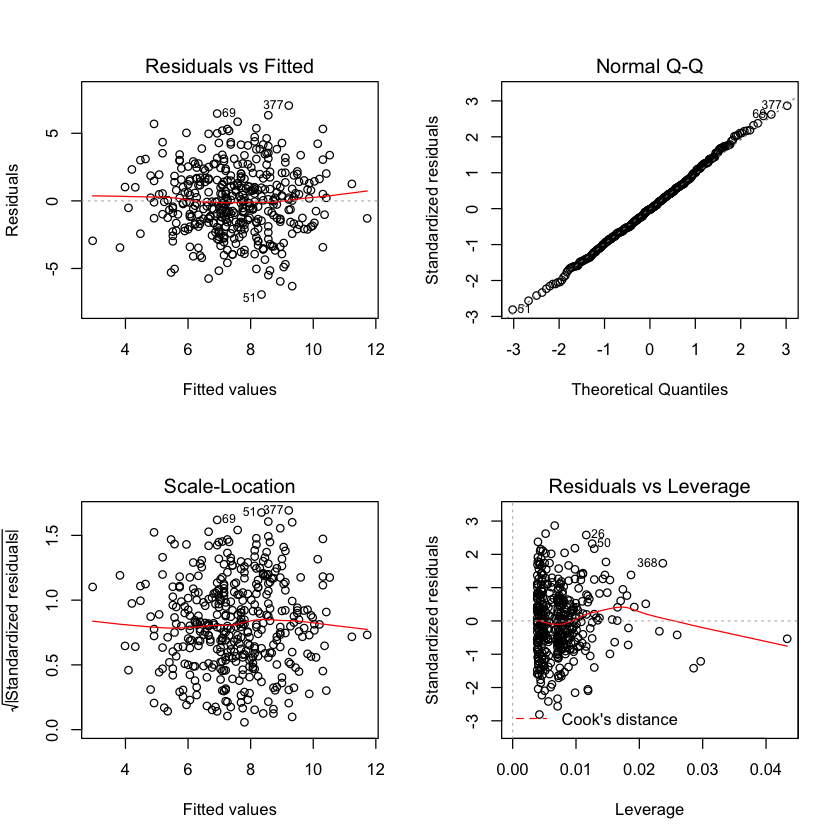

In [114]:
par(mfrow=c(2,2))
plot(min_sales_mr)

p = 2
n = length(Carseats$Sales)
paste0('average leverage: ', avg_leverage = round((p+1)/n,2))

**3.13**

**a)**

In [120]:
set.seed(1)
x <- rnorm(100, mean = 0, sd = 1)

**b)**

In [123]:
eps <- rnorm(100, mean = 0, sd = 0.25)

**c)** The length of y is 100. $\beta_0$ is -1 and $\beta_1$ is 0.5.

In [143]:
gen_int = -1
gen_slope = 0.5
y <- gen_int + gen_slope*x + eps
length(y)a

[1] 100

**d)** x and y appear to have a strong, positive linear relationship, though there is some variance (as defined above). 

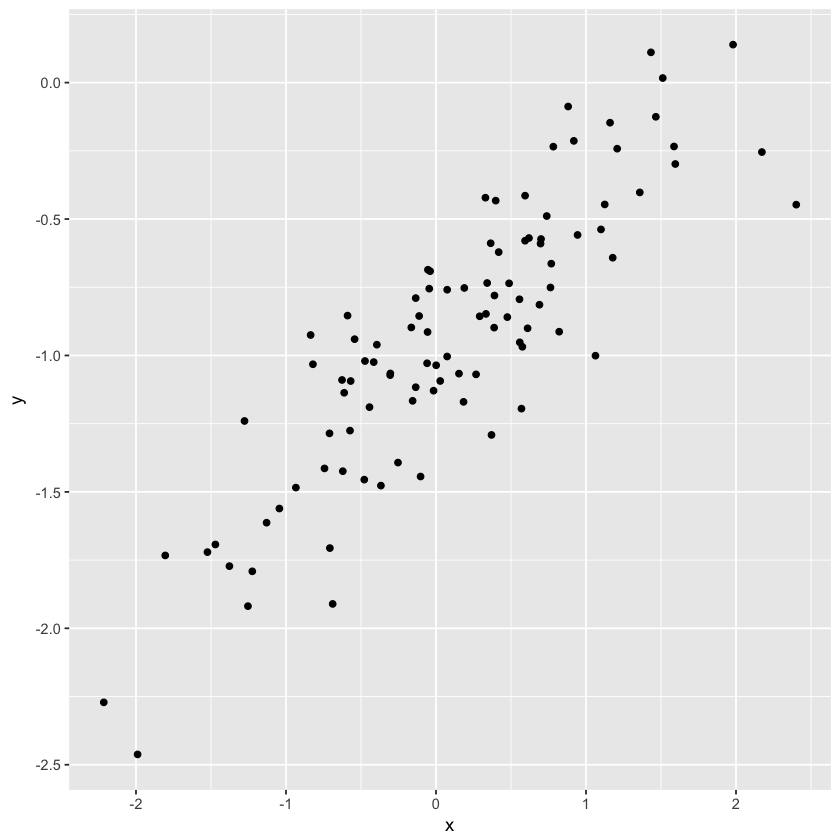

In [130]:
library(ggplot2)
df <- data.frame(x,y)
ggplot(df, aes(x=x, y=y))+
    geom_point()

**e)** $\hat{\beta_0}$ is very close to the generative $\beta_0$, at ~-0.99. This is also true for $\hat{\beta_1}$, which approximates $\beta_1$ very well at ~0.49.

In [133]:
lm_fit <- lm(y~x, df)
summary(lm_fit)


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62906 -0.13631 -0.00944  0.16822  0.46972 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98558    0.02507  -39.31   <2e-16 ***
x            0.48608    0.02785   17.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2489 on 98 degrees of freedom
Multiple R-squared:  0.7566,	Adjusted R-squared:  0.7542 
F-statistic: 304.7 on 1 and 98 DF,  p-value: < 2.2e-16


**f)**

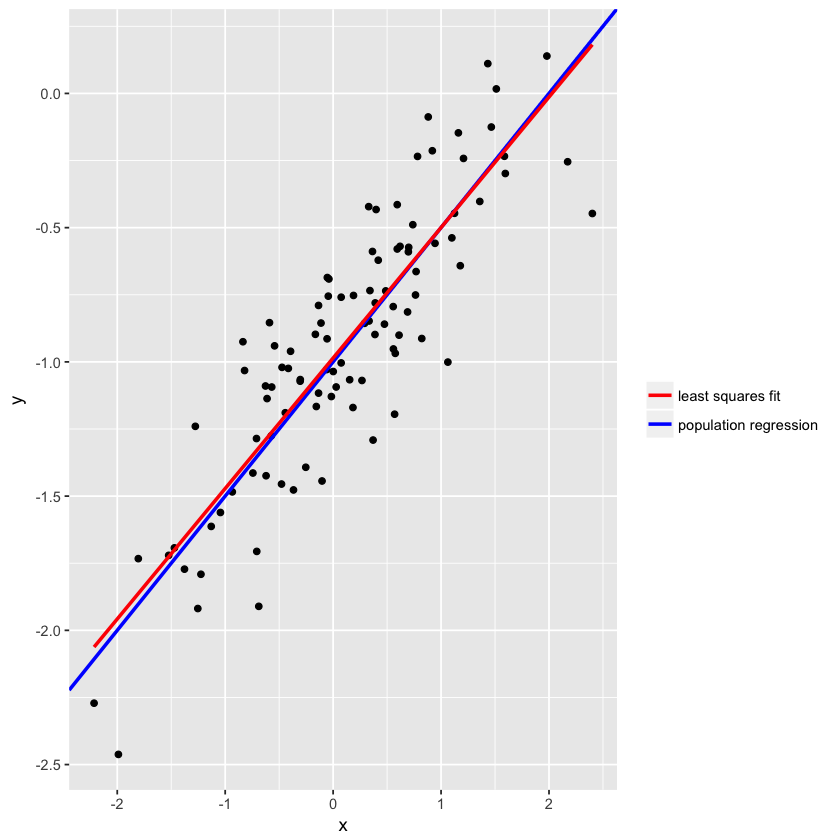

In [146]:
ggplot(df, aes(x=x, y=y))+
    geom_point()+
    geom_abline(aes(colour="population regression", intercept=gen_int, slope=gen_slope), size=1) +
    geom_smooth(aes(colour="least squares fit"), method = "lm", se=FALSE, formula = y ~ x) +
    scale_colour_manual(name="",values=c("red","blue")) +
    guides(colour = guide_legend(override.aes = list(alpha = 0)))

**g** There's no evidence that the quadratic term improves the fit of the model. While there is a minute increase in the adjusted $R^2$ value, it seems unlikely that the increase is reliable given that the $x^2$ coefficient is not significantly different from 0. 

In [150]:
quad_pm <- lm(y ~ x + I(x^2), df)
summary(quad_pm)


Call:
lm(formula = y ~ x + I(x^2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6004 -0.1525 -0.0151  0.1736  0.4683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.94799    0.02999 -31.614   <2e-16 ***
x            0.49333    0.02752  17.926   <2e-16 ***
I(x^2)      -0.04735    0.02160  -2.192   0.0308 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2442 on 97 degrees of freedom
Multiple R-squared:  0.7681,	Adjusted R-squared:  0.7633 
F-statistic: 160.7 on 2 and 97 DF,  p-value: < 2.2e-16


**h - i)**


In [159]:
eps2 <- rnorm(100, mean = 0, sd = 0.1)
eps3 <- rnorm(100, mean = 0, sd = 3)
clean_y <- gen_int + gen_slope*x + eps2
clean_lm <- lm(y2~x, df)
messy_y <- gen_int + gen_slope*x + eps3
messy_lm <- lm(messy_y~x, df)

In [167]:
summary(lm_fit)
summary(clean_lm)
summary(messy_lm)


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62906 -0.13631 -0.00944  0.16822  0.46972 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98558    0.02507  -39.31   <2e-16 ***
x            0.48608    0.02785   17.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2489 on 98 degrees of freedom
Multiple R-squared:  0.7566,	Adjusted R-squared:  0.7542 
F-statistic: 304.7 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = y2 ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25380 -0.09003 -0.00261  0.09359  0.20419 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00045    0.01110   -90.1   <2e-16 ***
x            0.50438    0.01233    40.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1102 on 98 degrees of freedom
Multiple R-squared:  0.9447,	Adjusted R-squared:  0.9441 
F-statistic:  1673 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = messy_y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9795 -2.0062 -0.2203  1.9860 10.2572 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -0.2674     0.3275  -0.817    0.416
x             0.4552     0.3638   1.251    0.214

Residual standard error: 3.251 on 98 degrees of freedom
Multiple R-squared:  0.01573,	Adjusted R-squared:  0.005684 
F-statistic: 1.566 on 1 and 98 DF,  p-value: 0.2138


In [177]:
full_df <- data.frame(x,y,messy_y,clean_y)
long_df <- gather(full_df, fit, y, y:clean_y, factor_key=TRUE)
str(long_df)

'data.frame':	300 obs. of  3 variables:
 $ x  : num  -0.626 0.184 -0.836 1.595 0.33 ...
 $ fit: Factor w/ 3 levels "y","messy_y",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ y  : num  -1.09 -1.17 -0.925 -0.298 -0.422 ...


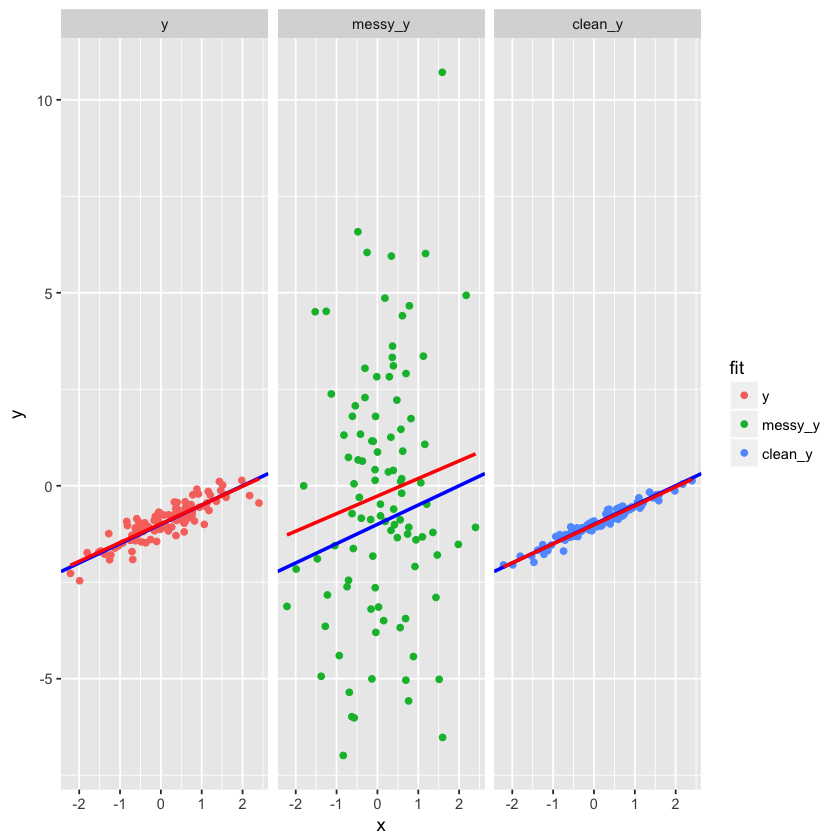

In [193]:
ggplot(long_df, aes(x=x, y=y, col=fit))+
    geom_point()+
    facet_grid(.~fit)+
    geom_abline(aes(colour="population regression", intercept=gen_int, slope=gen_slope), colour="blue", size=1) +
    geom_smooth(aes(colour="least squares line"), colour="red", method = "lm", se=FALSE, formula = y ~ x) 


Increasing the variability of the error decreases the goodness of the model fit as shown by $R^2$ values (original: 0.75, clean: 0.94, messy: 0.01) and RSE (original: 0.25, clean: 0.11, messy: 3.25). As shown by the above plots, the fitted regression line is farther away from the population regression line as $\epsilon$ increases.  Additionally, the null hypotheses for the coefficients for the messier model are retained (there's no evidence that they are significantly different from zero).

**j)** The 95% confidence intervals widen as $\epsilon$ increases and, consequently, they are more likely to encompass 0. 

In [165]:
confint(lm_fit)
confint(clean_lm)
confint(messy_lm)

,2.5 %,97.5 %
(Intercept),-1.035335,-0.9358323
x,0.430818,0.5413390


,2.5 %,97.5 %
(Intercept),-1.0224854,-0.9784172
x,0.4799051,0.5288531


,2.5 %,97.5 %
(Intercept),-0.9174063,0.3825247
x,-0.2666953,1.1771815


# 5) CBPP dataset modeling

**a) The relationship between herd size and CBPP incidence** 

The following objects are masked from cbpp (pos = 3):

    herd, incidence, period, size



'data.frame':	56 obs. of  4 variables:
 $ herd     : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 1 2 2 2 3 3 3 ...
 $ incidence: num  2 3 4 0 3 1 1 8 2 0 ...
 $ size     : num  14 12 9 5 22 18 21 22 16 16 ...
 $ period   : Factor w/ 4 levels "1","2","3","4": 1 2 3 4 1 2 3 1 2 3 ...


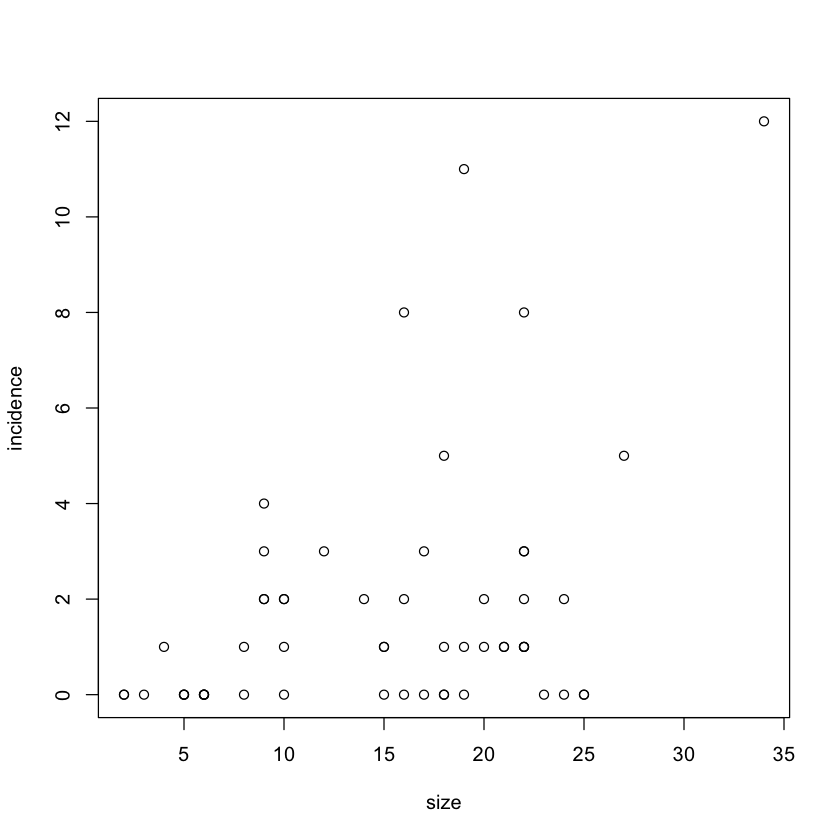

In [2]:
library(lme4)
?cbpp
attach(cbpp)
str(cbpp)
plot(size,incidence,  xlab='size', ylab='incidence')

**b) Modeling effect of herd size on CBPP incidence** 
Size is positively related to incidence. For every one unit increase in herd size, the incidence of CBPP increases by .13827 cases on average. However, herd size accounts for only ~14% of the variance in CBPP incidence, and the 95% confidence interval of the parameter estimate for size is relatively large (the population $\beta$ parameter falls between .05 and 0.23 95% of the time). 

In [4]:
incSize_felm <- lm(incidence~size)
summary(incSize_felm)
(incSize_ci <- confint(incSize_felm)
)


Call:
lm(formula = incidence ~ size)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1456 -1.5925 -0.4864  0.8006  8.6840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.31106    0.73554  -0.423  0.67405   
size         0.13827    0.04389   3.150  0.00266 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.432 on 54 degrees of freedom
Multiple R-squared:  0.1553,	Adjusted R-squared:  0.1396 
F-statistic: 9.926 on 1 and 54 DF,  p-value: 0.002657


,2.5 %,97.5 %
(Intercept),-1.78572128,1.163603
size,0.05027744,0.226253


**c) Herd identifier as a random effect** The random effect helps to reduce the (random) variance unassociated with the predictor. Here, the  variability associated with the experimental unit, herd, is accounted for so that we get a better sense of the effect of size on herd. For every one-unit increase in herd size, the incidence of CBPP increases by .196 cases. 

In [201]:
incSize_melm <- lmer(incidence~size + (size | herd ))
summary(incSize_melm)

Linear mixed model fit by REML ['lmerMod']
Formula: incidence ~ size + (size | herd)

REML criterion at convergence: 240.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7937 -0.5979 -0.1649  0.4924  2.5174 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 herd     (Intercept) 0.54020  0.7350        
          size        0.03311  0.1819   -1.00
 Residual             2.43192  1.5595        
Number of obs: 56, groups:  herd, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.54175    0.63638  -0.851
size         0.19644    0.06483   3.030

Correlation of Fixed Effects:
     (Intr)
size -0.822

**d) Model comparison using Akaike Information Criterion (AIC) scores**
The mixed effect model loses less information because it accounts for the random effect of herd. With a score difference of ~10 units, the information savings of the mixed effect model is moderate. 

In [202]:
(incSize_ic <- AIC(incSize_felm,incSize_melm)
)

,df,AIC
incSize_felm,3,262.4036
incSize_melm,6,252.2996
